# Ridge vs Lasso vs ElasticNet Regression — Theory & Interview Q&A

This notebook compares three regularized linear regression techniques: Ridge (L2), Lasso (L1), and ElasticNet (L1+L2). Each method helps prevent overfitting and handles multicollinearity, but with different strengths.

| Aspect                | Ridge Regression           | Lasso Regression           | ElasticNet Regression         |
|-----------------------|---------------------------|----------------------------|-------------------------------|
| **Penalty**           | L2 (squared coefficients) | L1 (absolute coefficients) | L1 + L2 (mix of both)         |
| **Feature Selection** | No                        | Yes                        | Yes (with L1 ratio)           |
| **Handles Multicollinearity** | Yes                | Yes                        | Yes                           |
| **Key Parameter**     | α (regularization strength)| α (regularization strength)| α, L1 ratio                   |
| **Pros**              | Stable estimates, handles collinearity | Feature selection, sparse models | Flexible, combines strengths   |
| **Cons**              | No feature elimination     | Can be unstable with correlated features | More parameters to tune        |

## Interview Q&A

**Q1: What is the main difference between Ridge, Lasso, and ElasticNet?**  
A: Ridge uses L2 penalty, Lasso uses L1, ElasticNet combines both.

**Q2: When should you use ElasticNet?**  
A: When you have many correlated features and want both regularization and feature selection.

**Q3: How does Lasso perform feature selection?**  
A: It can shrink some coefficients to zero, effectively removing features.

**Q4: What is the L1 ratio in ElasticNet?**  
A: It controls the mix between L1 and L2 penalties.

**Q5: How do you choose between these methods?**  
A: Use cross-validation to compare performance and select based on data characteristics.

Ridge Test R²: 0.5758
Lasso Test R²: 0.5769
ElasticNet Test R²: 0.5768


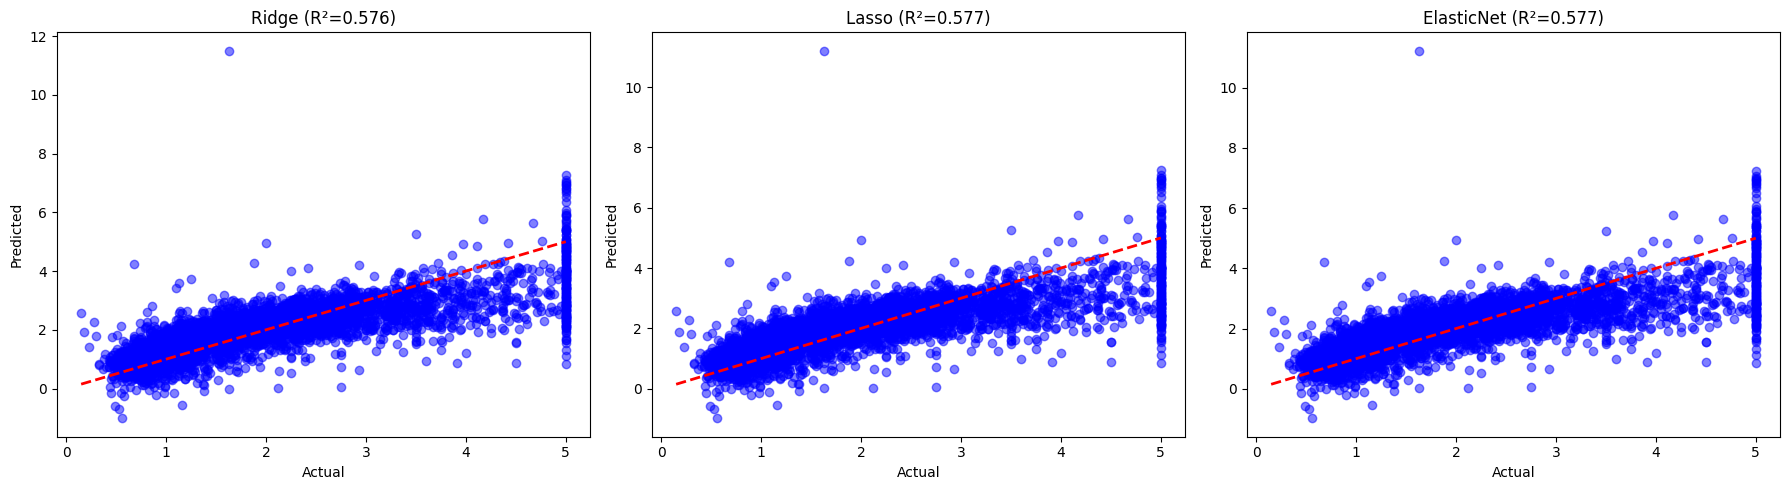

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Parameter grids
param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1.0]}
param_grid_elastic = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Pipelines
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
pipeline_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000))
])

# GridSearchCV
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, scoring='r2', cv=5, n_jobs=-1)
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, scoring='r2', cv=5, n_jobs=-1)
grid_elastic = GridSearchCV(pipeline_elastic, param_grid_elastic, scoring='r2', cv=5, n_jobs=-1)

# Fit models
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_elastic.fit(X_train, y_train)

# Best models
best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_
best_elastic = grid_elastic.best_estimator_

# Predictions
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_elastic = best_elastic.predict(X_test)

# R² scores
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Ridge Test R²: {r2_ridge:.4f}")
print(f"Lasso Test R²: {r2_lasso:.4f}")
print(f"ElasticNet Test R²: {r2_elastic:.4f}")

# Plot Actual vs Predicted for all models
plt.figure(figsize=(18, 5))

models = {
    'Ridge': (y_pred_ridge, r2_ridge),
    'Lasso': (y_pred_lasso, r2_lasso),
    'ElasticNet': (y_pred_elastic, r2_elastic)
}

for i, (name, (y_pred, score)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} (R²={score:.3f})')
    plt.tight_layout()

plt.show()


Ridge Test R²: 0.4572
Lasso Test R²: 0.4669
ElasticNet Test R²: 0.4600


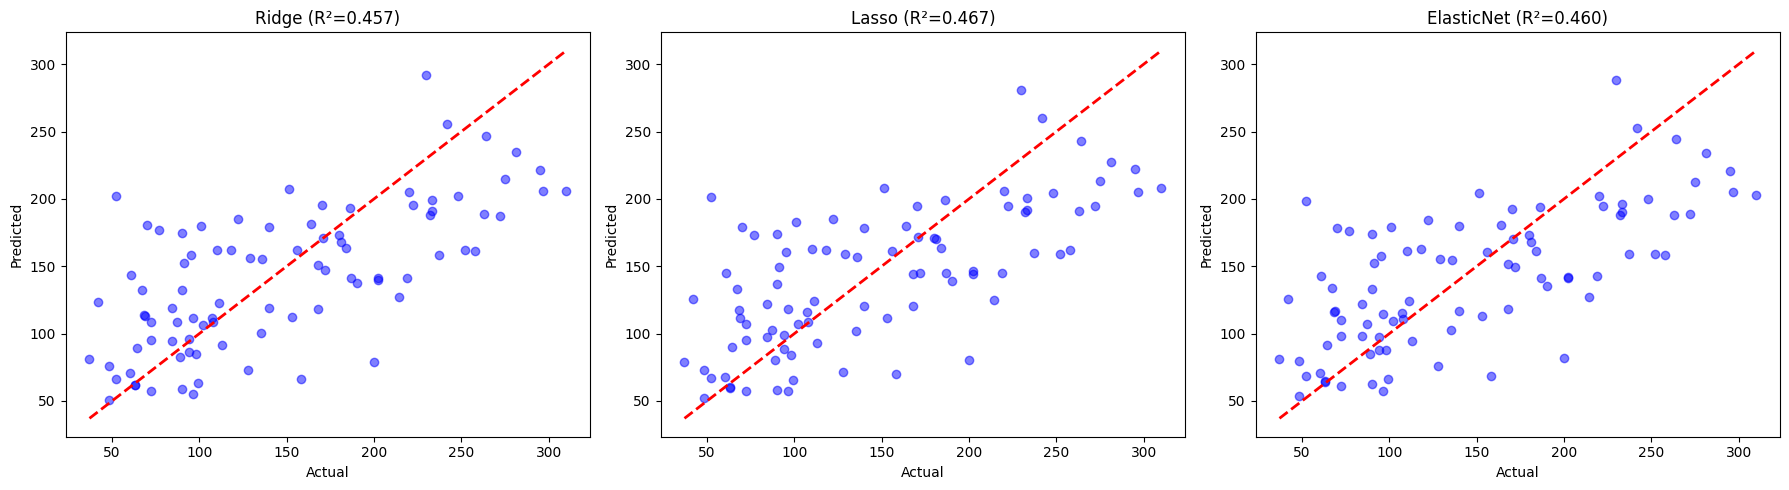

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Parameter grids
param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
param_grid_elastic = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Pipelines
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
pipeline_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000))
])

# GridSearchCV instances
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, scoring='r2', cv=5, n_jobs=-1)
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, scoring='r2', cv=5, n_jobs=-1)
grid_elastic = GridSearchCV(pipeline_elastic, param_grid_elastic, scoring='r2', cv=5, n_jobs=-1)

# Fit models
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_elastic.fit(X_train, y_train)

# Best models
best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_
best_elastic = grid_elastic.best_estimator_

# Predictions
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_elastic = best_elastic.predict(X_test)

# R² scores
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Ridge Test R²: {r2_ridge:.4f}")
print(f"Lasso Test R²: {r2_lasso:.4f}")
print(f"ElasticNet Test R²: {r2_elastic:.4f}")

# Plot Actual vs Predicted for all models
plt.figure(figsize=(18, 5))

models = {
    'Ridge': (y_pred_ridge, r2_ridge),
    'Lasso': (y_pred_lasso, r2_lasso),
    'ElasticNet': (y_pred_elastic, r2_elastic)
}

for i, (name, (y_pred, score)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} (R²={score:.3f})')
    plt.tight_layout()

plt.show()
